### PCA : Proteins

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.decomposition import PCA
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
sns.set(font_scale=2.8)

### Data

In [6]:
data = pd.read_csv('../../../1.DATA/score/score.csv')
data = data.set_index('Protein')
def rearrang(olddf):
    col = ['CVA','IHD','CM','ARR','VD','CHD']
    newdf = pd.DataFrame()
    for t in col:
        newdf[t]= olddf[t]
    return newdf
ndf = rearrang(data)
ndf.head()

,CVA,IHD,CM,ARR,VD,CHD
Protein,,,,,,
small_ubiquitin-related_modifier_1,0.041144,0.012216,0.078019,0.000000,0.000000,0.024314
metalloproteinase_inhibitor_4,0.042887,0.054740,0.095265,0.045032,0.034227,0.005072
aromatic-l-amino-acid_decarboxylase,0.055959,0.010260,0.011459,0.070661,0.000000,0.007809
nadph_oxidase_activator_1,0.035732,0.000000,0.000000,0.000000,0.000000,0.000000
tumor_necrosis_factor_ligand_superfamily_member_14,0.035732,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
def feature_norm(df):
    dff = df.copy(deep =True)
    fchr = ['CVA','IHD','CM','ARR','VD','CHD']
    for t in fchr:
        dff[t] = (df[t]-df[t].min())/(df[t].max()-df[t].min())
    return dff
ndfn = feature_norm(ndf)
ndfn.head()

,CVA,IHD,CM,ARR,VD,CHD
Protein,,,,,,
small_ubiquitin-related_modifier_1,0.059894,0.029087,0.226948,0.000000,0.000000,0.040827
metalloproteinase_inhibitor_4,0.062432,0.130334,0.277115,0.147418,0.093665,0.008517
aromatic-l-amino-acid_decarboxylase,0.081461,0.024430,0.033333,0.231319,0.000000,0.013113
nadph_oxidase_activator_1,0.052016,0.000000,0.000000,0.000000,0.000000,0.000000
tumor_necrosis_factor_ligand_superfamily_member_14,0.052016,0.000000,0.000000,0.000000,0.000000,0.000000


### Switcher

In [8]:
#ndf = ndfn.copy(deep =True)

----------------

### Add colors

In [9]:
tdata = ndf.copy(deep =True)

In [10]:
clrs = []
for row,col in tdata.T.iteritems():
    val = np.array(col)
    mx = max(val)
    for item in val:
        if  mx == col[0]:
            grp =  'navy'
        elif mx == col[1]:
            grp =  'green'
        elif mx == col[2]:
            grp = 'firebrick'
        elif mx == col[3]:
            grp = 'mediumslateblue'
        elif mx == col[4]:
            grp = 'darkgoldenrod'
        elif mx == col[5]:
            grp = 'deepskyblue'
    clrs.append(grp)

--------

### PCA : Weights

---------------------

In [11]:
def pca_results(good_data, pca,fname):
	clc  =['navy','green','firebrick','mediumslateblue','darkgoldenrod', 'deepskyblue']

	# Dimension indexing
	dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

	# PCA components
	components = pd.DataFrame(np.round(pca.components_, 4), columns = good_data.keys())
	components.index = dimensions

	# PCA explained variance
	ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
	variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
	variance_ratios.index = dimensions

	# Create a bar plot visualization
	fig, ax = plt.subplots(figsize = (22,10))

	# Plot the feature weights as a function of the components
	components.plot(ax = ax, kind = 'bar', color  = clc );
	ax.set_ylabel("Feature Weights",fontsize =20)
	ax.set_xticklabels(dimensions, rotation=0, fontsize = 20)


	# Display the explained variance ratios
	for i, ev in enumerate(pca.explained_variance_ratio_):
		ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev),fontsize =20)

	# Return a concatenated DataFrame
	plt.legend(fontsize =15)
	plt.savefig(fname)
	return pd.concat([variance_ratios, components], axis = 1)

In [12]:
wt_data = ndf.copy(deep =True)

In [13]:
wt_data.head()

,CVA,IHD,CM,ARR,VD,CHD
Protein,,,,,,
small_ubiquitin-related_modifier_1,0.041144,0.012216,0.078019,0.000000,0.000000,0.024314
metalloproteinase_inhibitor_4,0.042887,0.054740,0.095265,0.045032,0.034227,0.005072
aromatic-l-amino-acid_decarboxylase,0.055959,0.010260,0.011459,0.070661,0.000000,0.007809
nadph_oxidase_activator_1,0.035732,0.000000,0.000000,0.000000,0.000000,0.000000
tumor_necrosis_factor_ligand_superfamily_member_14,0.035732,0.000000,0.000000,0.000000,0.000000,0.000000


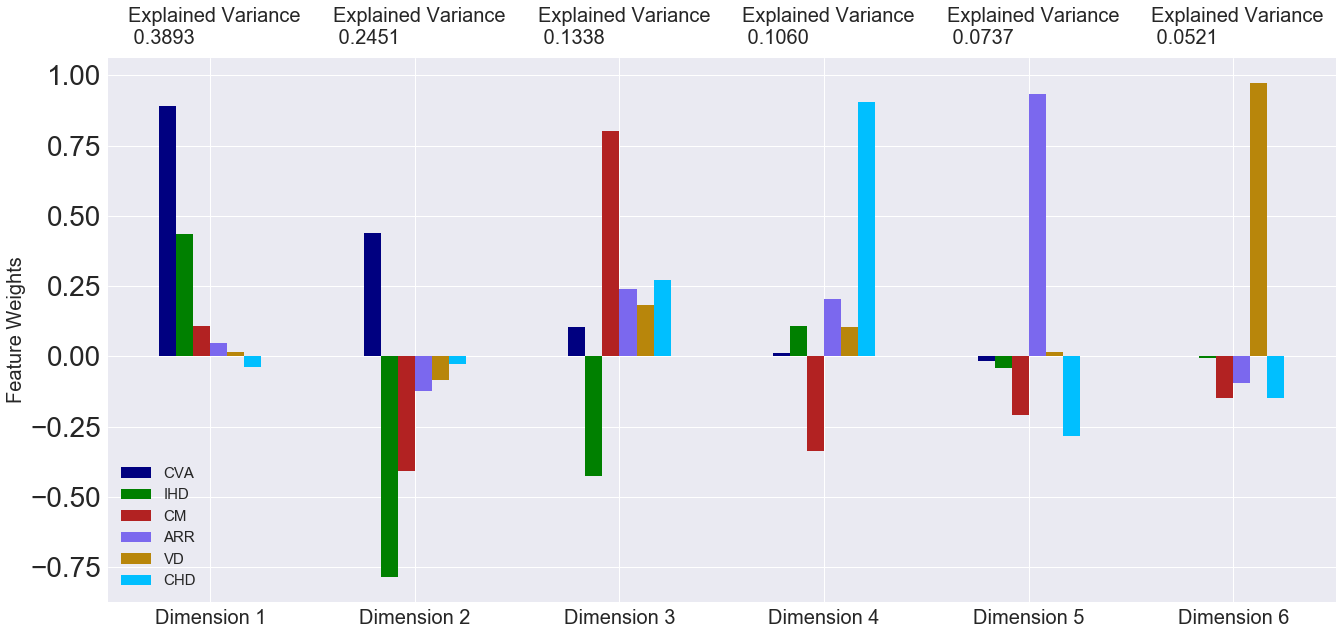

In [14]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA()
pca.fit(wt_data)


# Generate PCA results plot
pca_results = pca_results(wt_data, pca, fname = 'pca-cvd-weights.pdf')


In [15]:
pca_results

,Explained Variance,CVA,IHD,CM,ARR,VD,CHD
Dimension 1,0.3893,0.8919,0.4348,0.1083,0.0469,0.0171,-0.0360
Dimension 2,0.2451,0.4396,-0.7855,-0.4089,-0.1228,-0.0825,-0.0261
Dimension 3,0.1338,0.1045,-0.4247,0.8012,0.2413,0.1844,0.2733
Dimension 4,0.1060,0.0116,0.1094,-0.3380,0.2032,0.1053,0.9062
Dimension 5,0.0737,-0.0164,-0.0397,-0.2072,0.9351,0.0152,-0.2837
Dimension 6,0.0521,0.0008,-0.0050,-0.1485,-0.0935,0.9734,-0.1469


In [16]:
pca.components_

array([[ 8.91854007e-01,  4.34819516e-01,  1.08340226e-01,
         4.69411949e-02,  1.70810217e-02, -3.59941367e-02],
       [ 4.39618269e-01, -7.85482002e-01, -4.08867317e-01,
        -1.22827173e-01, -8.25405413e-02, -2.61125158e-02],
       [ 1.04537426e-01, -4.24698317e-01,  8.01152643e-01,
         2.41250372e-01,  1.84355510e-01,  2.73256315e-01],
       [ 1.15629765e-02,  1.09449316e-01, -3.37995273e-01,
         2.03162926e-01,  1.05277612e-01,  9.06249298e-01],
       [-1.64236257e-02, -3.97116415e-02, -2.07240723e-01,
         9.35143291e-01,  1.51865563e-02, -2.83691605e-01],
       [ 8.34765110e-04, -5.01854560e-03, -1.48508699e-01,
        -9.34886041e-02,  9.73444573e-01, -1.46917759e-01]])

----------

### PCA: Biplot

In [17]:
pdata = ndf.copy(deep = True)
ppdata = ndf.copy(deep = True)

In [18]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(pdata)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(ppdata)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [19]:
def biplot(good_data, reduced_data, pca,fname,clrs):
   

    fig, ax = plt.subplots(figsize = (25,15))
    clc  =['navy','green','firebrick','mediumslateblue','darkgoldenrod', 'deepskyblue']
    
    # scatterplot of the reduced data    
    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], 
        facecolors = clrs, edgecolors= clrs, s=50, alpha=0.5)
    
    
    
    feature_vectors = pca.components_.T

    
    # we use scaling factors to make the arrows easier to see
    asize, tpos = 0.5, 0.5,
    

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        
        ax.arrow(0, 0, v[0]*asize, v[1]*asize, 
                  head_width=0.005, head_length=0.005, linewidth=2, color= clc[i])
        
        ax.text(v[0]*tpos+ 0.018, v[1]*tpos-0.028, good_data.columns[i], color='black', 
                 ha='center', va='center', fontsize=40)
        
    plt.axis([-0.1, 0.8, -0.5, 0.4])
    ax.set_xlabel("PC 1", fontsize=50)
    ax.set_ylabel("PC 2", fontsize=50)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.savefig(fname)
    return ax

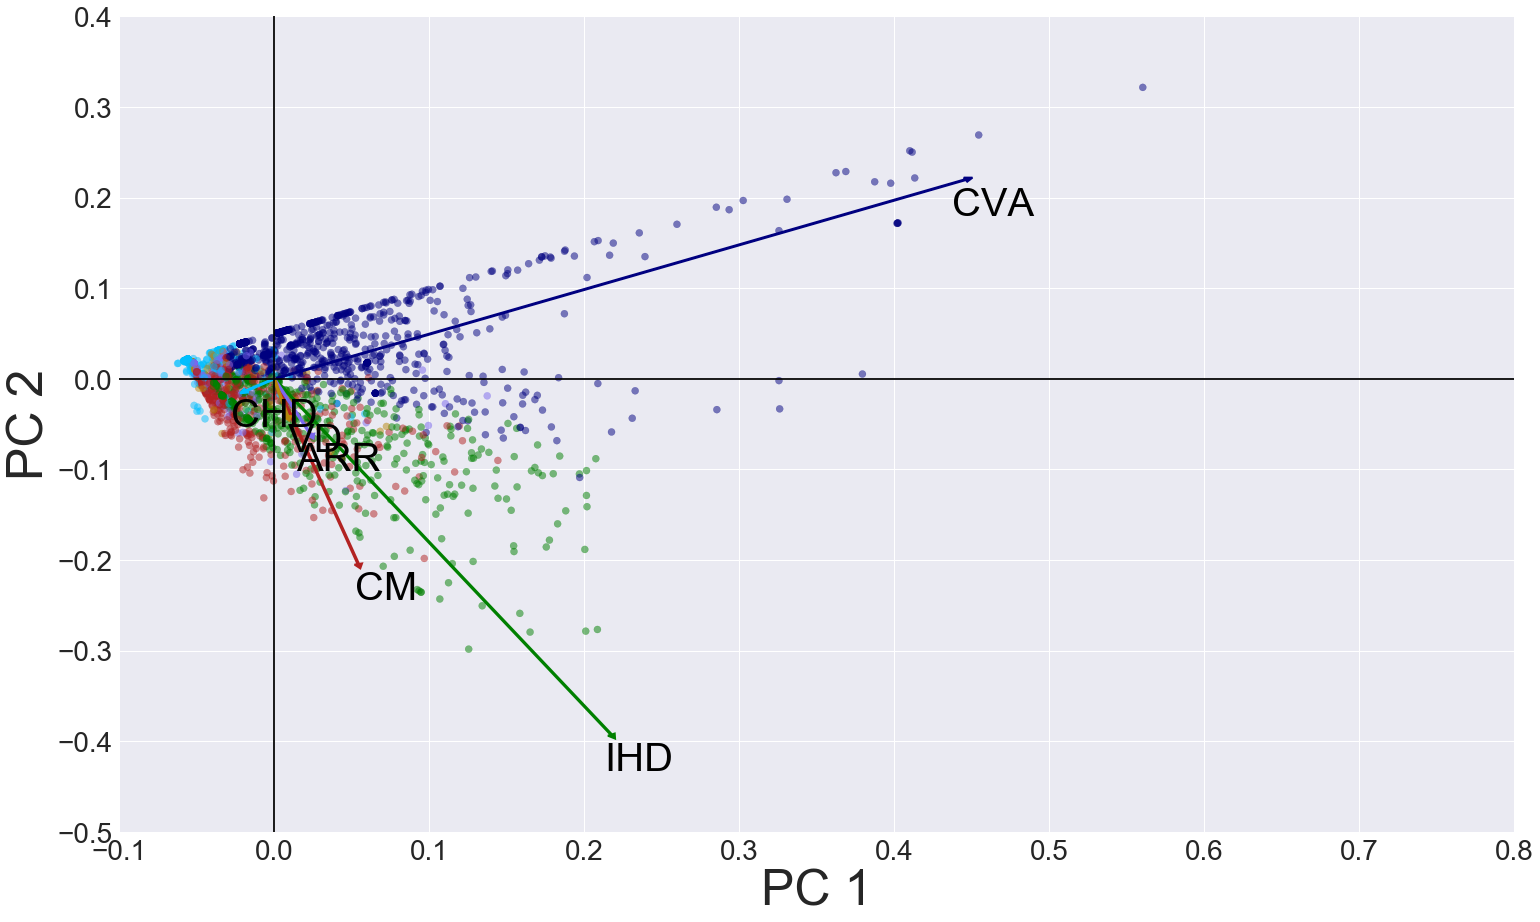

In [20]:
newdata = ndf.copy(deep =True)
# Create a biplot
biplot(newdata, reduced_data, pca,'protein-biplot.pdf',clrs)